In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np 


In [2]:
df=pd.read_csv('stock.csv',index_col='Date',parse_dates=True)

In [3]:
df=df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-01,520.714172,523.017334,518.782471,520.565552,507.237732,4718327
1,2016-11-02,515.612488,516.528809,505.706421,507.068512,494.086243,3248957
2,2016-11-03,507.118042,512.516846,505.508301,507.167572,494.182770,3374427
3,2016-11-04,505.334930,508.628723,495.304993,498.053955,485.302490,5323812
4,2016-11-07,502.239258,503.502289,494.834473,495.874603,483.178925,4387036
...,...,...,...,...,...,...,...
1229,2021-10-25,2680.000000,2680.000000,2570.000000,2601.800049,2601.800049,7937067
1230,2021-10-26,2617.100098,2668.899902,2603.149902,2661.050049,2661.050049,4499706
1231,2021-10-27,2652.000000,2676.800049,2619.949951,2627.399902,2627.399902,4567140
1232,2021-10-28,2620.000000,2637.949951,2590.500000,2598.600098,2598.600098,4562471


In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(df['Open'],trend='mul',seasonal='mul',seasonal_periods=30).fit().fittedvalues.shift(-1)

C:\Users\yashm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\yashm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [5]:
df['holt']=model

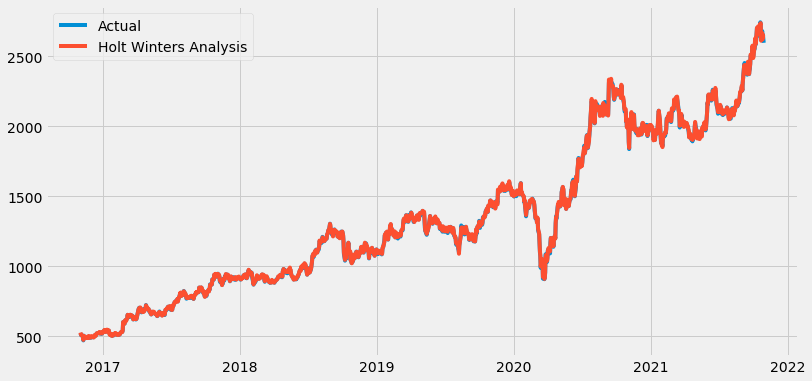

In [26]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Open'],label="Actual")
plt.plot(df['Date'],df['holt'],label="Holt Winters Analysis")
plt.legend()

In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,holt
0,2016-11-01,520.714172,523.017334,518.782471,520.565552,507.237732,4718327,526.691508
1,2016-11-02,515.612488,516.528809,505.706421,507.068512,494.086243,3248957,516.797563
2,2016-11-03,507.118042,512.516846,505.508301,507.167572,494.182770,3374427,508.781216
3,2016-11-04,505.334930,508.628723,495.304993,498.053955,485.302490,5323812,507.739115
4,2016-11-07,502.239258,503.502289,494.834473,495.874603,483.178925,4387036,505.453215
...,...,...,...,...,...,...,...,...
1229,2021-10-25,2680.000000,2680.000000,2570.000000,2601.800049,2601.800049,7937067,2666.475610
1230,2021-10-26,2617.100098,2668.899902,2603.149902,2661.050049,2661.050049,4499706,2621.780321
1231,2021-10-27,2652.000000,2676.800049,2619.949951,2627.399902,2627.399902,4567140,2648.942977
1232,2021-10-28,2620.000000,2637.949951,2590.500000,2598.600098,2598.600098,4562471,2640.369898


In [17]:
model=ExponentialSmoothing(df['Open'],trend='mul',seasonal='mul',seasonal_periods=30).fit()

C:\Users\yashm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\yashm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [18]:
forecast=model.forecast(30)

In [19]:
df_forecast=pd.DataFrame({})

In [20]:
df_forecast['forecast']=forecast

In [21]:
final=pd.concat([df,df_forecast],axis=0)

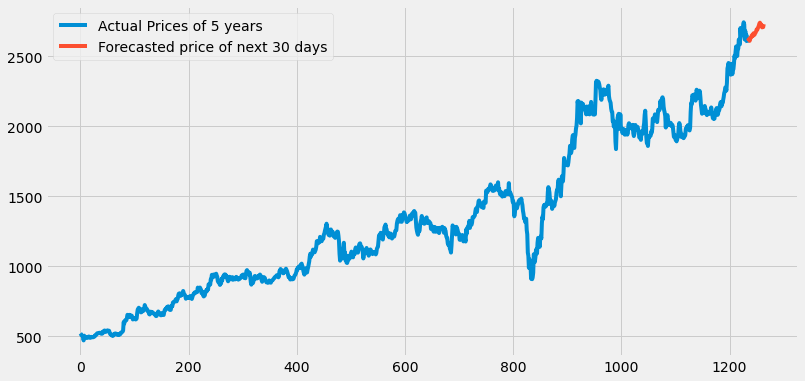

In [23]:
plt.figure(figsize=(12,6))
final['Open'].plot(label='Actual Prices of 5 years')
final['forecast'].plot(label='Forecasted price of next 30 days')
plt.legend()

,Date,Open,High,Low,Close,Adj Close,Volume,holt,forecast
0,2016-11-01,520.714172,523.017334,518.782471,520.565552,507.237732,4718327.0,526.691508,NaN
1,2016-11-02,515.612488,516.528809,505.706421,507.068512,494.086243,3248957.0,516.797563,NaN
2,2016-11-03,507.118042,512.516846,505.508301,507.167572,494.182770,3374427.0,508.781216,NaN
3,2016-11-04,505.334930,508.628723,495.304993,498.053955,485.302490,5323812.0,507.739115,NaN
4,2016-11-07,502.239258,503.502289,494.834473,495.874603,483.178925,4387036.0,505.453215,NaN
...,...,...,...,...,...,...,...,...,...
1259,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2724.309694
1260,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2706.482745
1261,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2713.702216
1262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2708.217825
